In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("reg_data.xlsx")

In [5]:
df

,Outlook,Temperature,Humidity,Wind,Hrs Played
0,Sunny,Hot,High,Weak,25
1,Sunny,Hot,High,Strong,30
2,Overcast,Hot,High,Weak,46
3,Rain,Mild,High,Weak,45
4,Rain,Cool,Normal,Weak,52
5,Rain,Cool,Normal,Strong,23
6,Overcast,Cool,Normal,Strong,43
7,Sunny,Mild,High,Weak,35
8,Sunny,Cool,Normal,Weak,38
9,Rain,Mild,Normal,Weak,46


In [7]:
n = len(df)    # Count
n

14

In [8]:
mean = df["Hrs Played"].mean()
mean

39.785714285714285

In [9]:
std_data = np.std(df["Hrs Played"])
std_data

9.321086474291743

In [11]:
cv = (std_data / mean)*100
cv

23.428224531433468

In [12]:
# Outlook - Sunny, Overcast, Rain

In [14]:
sunny = df[df["Outlook"]=="Sunny"]
std_sunny = np.std(sunny["Hrs Played"])
std_sunny

7.782030583337487

In [19]:
sunny

,Outlook,Temperature,Humidity,Wind,Hrs Played
0,Sunny,Hot,High,Weak,25
1,Sunny,Hot,High,Strong,30
7,Sunny,Mild,High,Weak,35
8,Sunny,Cool,Normal,Weak,38
10,Sunny,Mild,Normal,Strong,48


In [15]:
overcast = df[df["Outlook"]=="Overcast"]
std_overcast = np.std(overcast["Hrs Played"])
std_overcast

3.491060010942235

In [20]:
overcast

,Outlook,Temperature,Humidity,Wind,Hrs Played
2,Overcast,Hot,High,Weak,46
6,Overcast,Cool,Normal,Strong,43
11,Overcast,Mild,High,Strong,52
12,Overcast,Hot,Normal,Weak,44


In [16]:
rain = df[df["Outlook"]=="Rain"]
std_rain = np.std(rain["Hrs Played"])
std_rain

10.870142593360953

In [21]:
rain

,Outlook,Temperature,Humidity,Wind,Hrs Played
3,Rain,Mild,High,Weak,45
4,Rain,Cool,Normal,Weak,52
5,Rain,Cool,Normal,Strong,23
9,Rain,Mild,Normal,Weak,46
13,Rain,Mild,High,Strong,30


In [17]:
weighted_std_outlook = (len(sunny)/n)*std_sunny + (len(overcast)/n)*std_overcast + (len(rain)/n)*std_rain
weighted_std_outlook

7.6589361376615095

In [18]:
sdr_outlook = std_data - weighted_std_outlook
sdr_outlook

1.6621503366302335

The Column with highest standard deviation reduction value will be consider for root node

Termination criteria (Threshold) this is the value of cv
In this example we will consider the value is 10%
if any class cv from a root node will be less than threshold we will consider it as 
leaf node

In [23]:
mean_sunny = sunny["Hrs Played"].mean()
mean_sunny

35.2

In [24]:
mean_overcast = overcast["Hrs Played"].mean()
mean_overcast

46.25

In [25]:
mean_rain = rain["Hrs Played"].mean()
mean_rain

39.2

In [26]:
cv_sunny = (std_sunny / mean_sunny) * 100
cv_sunny

22.108041429936044

In [27]:
cv_overcast = (std_overcast / mean_overcast) * 100
cv_overcast

7.548237861496725

In [29]:
cv_rain = (std_rain / mean_rain) * 100
cv_rain

27.729955595308553

In [30]:
sunny_hot = sunny[sunny["Temperature"]=="Hot"]
sunny_hot

,Outlook,Temperature,Humidity,Wind,Hrs Played
0,Sunny,Hot,High,Weak,25
1,Sunny,Hot,High,Strong,30


In [31]:
mean_sunny_hot = sunny_hot["Hrs Played"].mean()
mean_sunny_hot

27.5

In [32]:
std_sunny_hot = np.std(sunny_hot["Hrs Played"])
std_sunny_hot

2.5

In [33]:
sunny_mild = sunny[sunny["Temperature"]=="Mild"]
sunny_mild

,Outlook,Temperature,Humidity,Wind,Hrs Played
7,Sunny,Mild,High,Weak,35
10,Sunny,Mild,Normal,Strong,48


In [34]:
mean_sunny_mild = sunny_mild["Hrs Played"].mean()
mean_sunny_mild

41.5

In [35]:
std_sunny_mild = np.std(sunny_mild["Hrs Played"])
std_sunny_mild

6.5

In [36]:
sunny_cool = sunny[sunny["Temperature"]=="Cool"]
sunny_cool

,Outlook,Temperature,Humidity,Wind,Hrs Played
8,Sunny,Cool,Normal,Weak,38


In [37]:
mean_sunny_cool = sunny_cool["Hrs Played"].mean()
mean_sunny_cool

38.0

In [38]:
std_sunny_cool = np.std(sunny_cool["Hrs Played"])
std_sunny_cool

0.0

In [40]:
weighed_std_temp = (len(sunny_hot)/len(sunny))*std_sunny_hot + (len(sunny_mild)/len(sunny))*std_sunny_mild + (len(sunny_cool)/len(sunny)*std_sunny_cool)
weighed_std_temp

3.6

In [41]:
sdr_sunny_temp = std_sunny - weighed_std_temp
sdr_sunny_temp

4.182030583337488

In [42]:
level = np.arange(1,11)
level

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [43]:
salary = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000])
salary

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
model = DecisionTreeRegressor()

In [47]:
model.fit(level.reshape(-1,1), salary)

DecisionTreeRegressor()

In [48]:
model.predict([[5.5]])

array([110000.])

In [49]:
model.predict([[3.7]])

array([80000.])

In [50]:
model.predict([[7.1]])

array([200000.])

In [51]:
model.predict([[7.7]])

array([300000.])

In [54]:
x = level
x_grid = np.arange(min(x),max(x), 0.01)
x_grid = x_grid.reshape(len(x_grid),1)
x_grid

array([[1.  ],
       [1.01],
       [1.02],
       [1.03],
       [1.04],
       [1.05],
       [1.06],
       [1.07],
       [1.08],
       [1.09],
       [1.1 ],
       [1.11],
       [1.12],
       [1.13],
       [1.14],
       [1.15],
       [1.16],
       [1.17],
       [1.18],
       [1.19],
       [1.2 ],
       [1.21],
       [1.22],
       [1.23],
       [1.24],
       [1.25],
       [1.26],
       [1.27],
       [1.28],
       [1.29],
       [1.3 ],
       [1.31],
       [1.32],
       [1.33],
       [1.34],
       [1.35],
       [1.36],
       [1.37],
       [1.38],
       [1.39],
       [1.4 ],
       [1.41],
       [1.42],
       [1.43],
       [1.44],
       [1.45],
       [1.46],
       [1.47],
       [1.48],
       [1.49],
       [1.5 ],
       [1.51],
       [1.52],
       [1.53],
       [1.54],
       [1.55],
       [1.56],
       [1.57],
       [1.58],
       [1.59],
       [1.6 ],
       [1.61],
       [1.62],
       [1.63],
       [1.64],
       [1.65],
       [1.

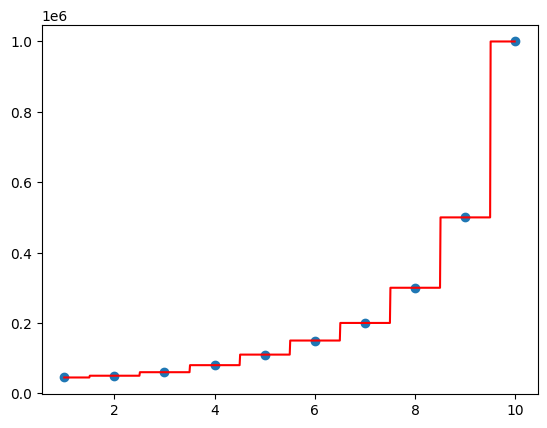

In [56]:
plt.scatter(x, salary)
plt.plot(x_grid, model.predict(x_grid), "r-")
plt.show()

In [57]:
from sklearn import tree

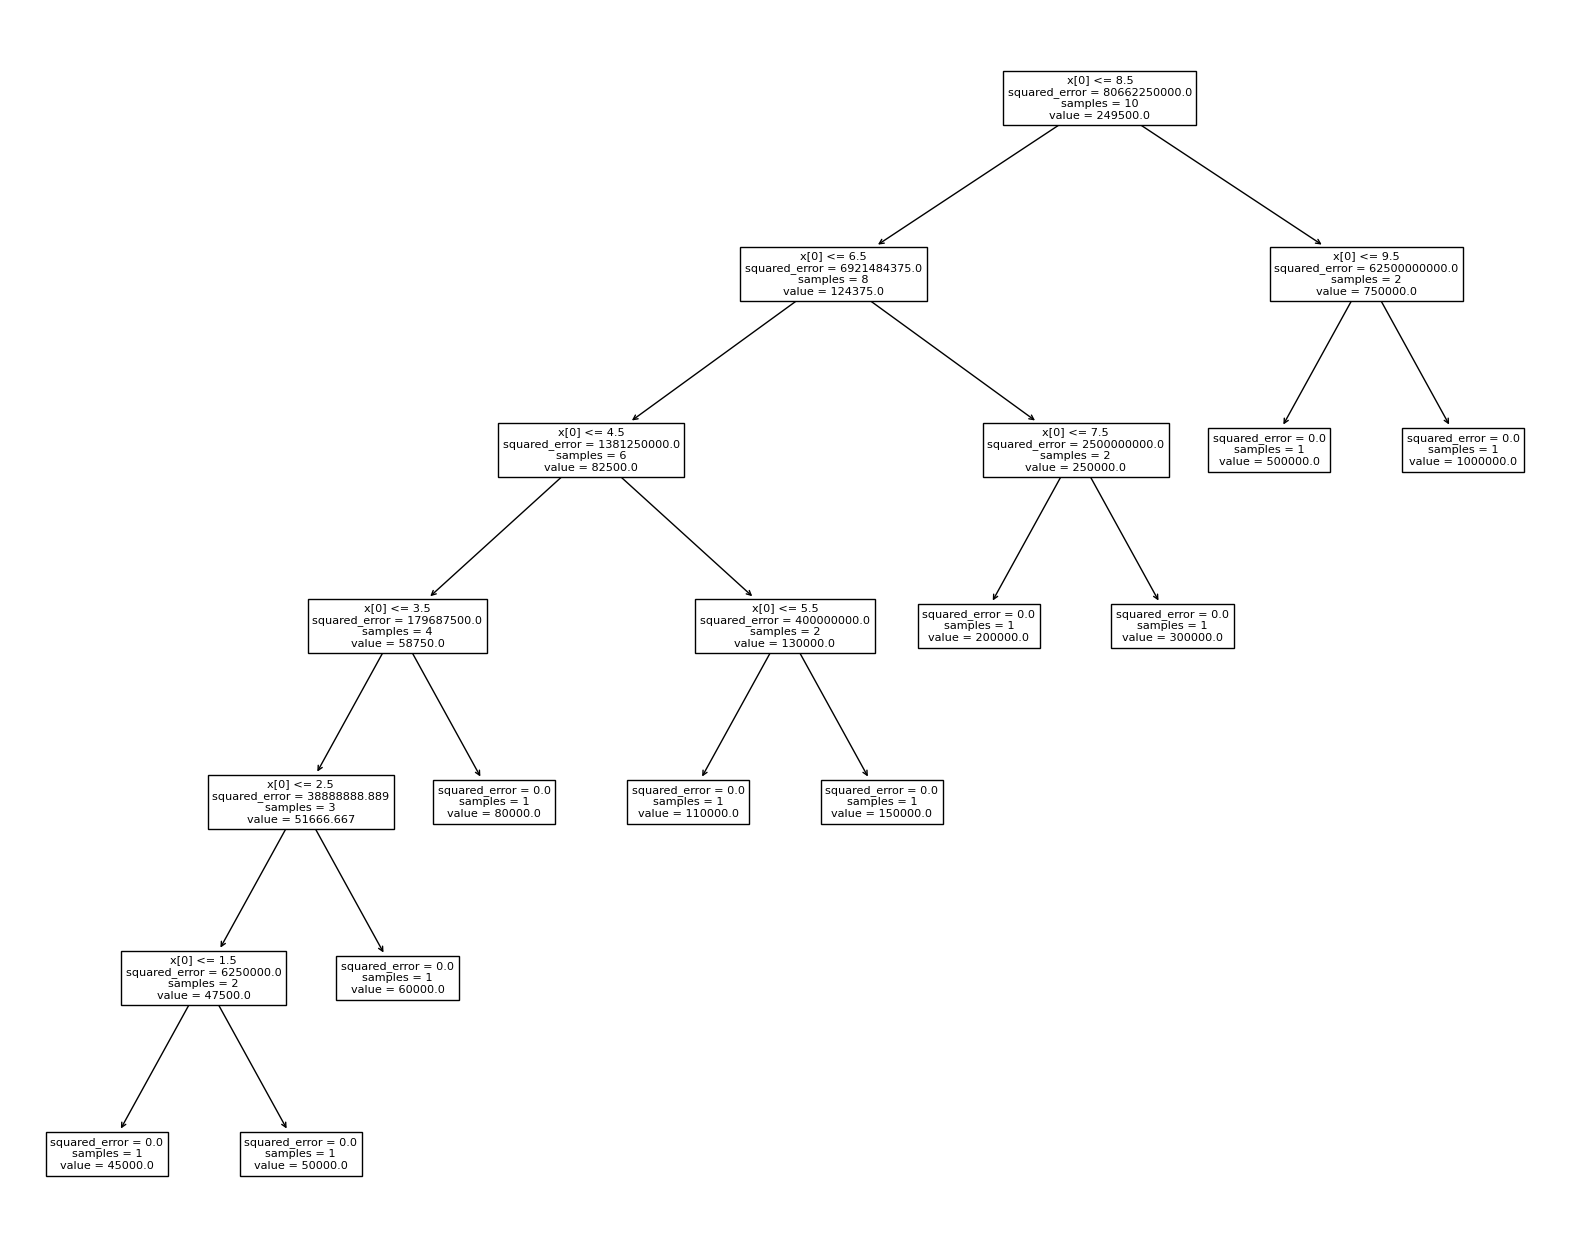

In [60]:
plt.figure(figsize=(20,16))
tree.plot_tree(model)
plt.show()

In [61]:
model.predict([[1.6]])

array([50000.])

In [74]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [65]:
data = df.drop("Hrs Played", axis=1)
data.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [77]:
for i in data.columns:
    a = le.fit(data[i])
    data[i] = le.transform(data[i])

In [79]:
data["target"] = df["Hrs Played"]

In [80]:
data

,Outlook,Temperature,Humidity,Wind,target
0,2,1,0,1,25
1,2,1,0,0,30
2,0,1,0,1,46
3,1,2,0,1,45
4,1,0,1,1,52
5,1,0,1,0,23
6,0,0,1,0,43
7,2,2,0,1,35
8,2,0,1,1,38
9,1,2,1,1,46


In [81]:
model2 = DecisionTreeRegressor()

In [82]:
X = data.drop("target", axis=1)
y = data["target"]

In [83]:
model2.fit(X,y)

DecisionTreeRegressor()

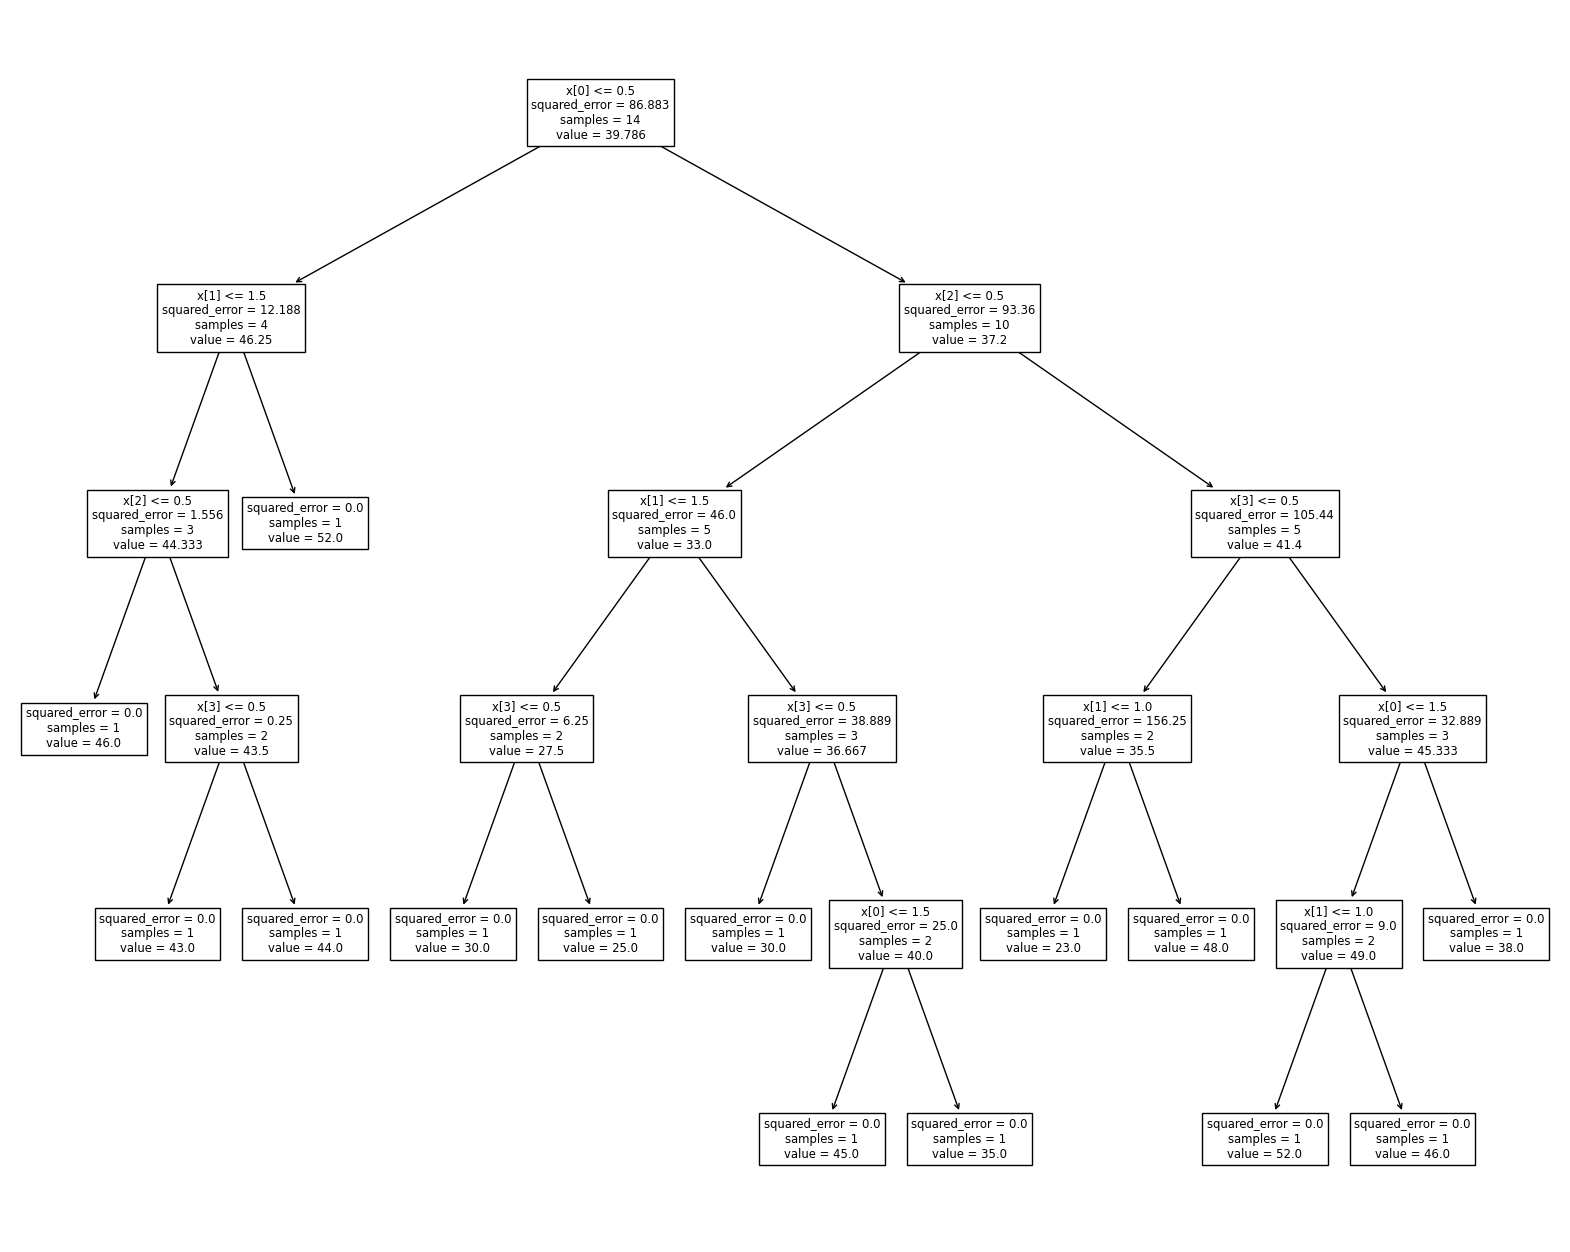

In [84]:
plt.figure(figsize=(20,16))
tree.plot_tree(model2)
plt.show()